# Predição de Doença Cardíaca – Análise Exploratória de Dados (EDA)

Neste notebook, realizaremos a **EDA** de um dataset contendo informações clínicas e demográficas de pacientes, com o objetivo de identificar padrões relacionados à presença de doenças cardíacas.  
A variável alvo é `target` (1 = presença de doença cardíaca, 0 = ausência).

In [136]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

## 1. Entendendo os dados

O dataset contém informações de pacientes relacionadas à saúde cardíaca.

In [155]:
# Carregando o dataset
df = pd.read_csv("/Users/laisbertoni/Documents/data-analysis-projects/data-analysis-projects/projeto-03-heart-disease/data/raw/heart.csv.xls")

# Visualizando tabela
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [138]:
# Informações gerais
display(df.info())

# Verificando valores nulos
display(df.isnull().sum())

# Verificando duplicatas
display(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

723

### Dicionário das variáveis

- `age`: idade do paciente  
- `sex`: sexo do paciente  
- `cp`: tipo de dor no peito (0-3)  
- `trestbps`: pressão arterial em repouso  
- `chol`: colesterol sérico em mg/dl  
- `fbs`: glicemia em jejum >120 mg/dl  
- `restecg`: resultados do eletrocardiograma em repouso (0, 1, 2)  
- `thalach`: frequência cardíaca máxima atingida  
- `exang`: angina induzida por exercício  
- `oldpeak`: depressão do segmento ST induzida por exercício  
- `slope`: inclinação do segmento ST no pico do exercício  
- `ca`: número de vasos principais (0-3) coloridos por fluoroscopia  
- `thal`: 0 = normal, 1 = defeito fixo, 2 = defeito reversível  
- `target`: presença de doença cardíaca (1 = sim, 0 = não)

• Irei remover os valores duplicados, pois, posteriormente, ao aplicar um modelo preditivo, esses registros repetidos podem causar overfitting e distorcer os resultados do modelo.

In [139]:
# Removendo duplicatas
df = df.drop_duplicates()

# Reiniciando índice
df = df.reset_index(drop=True)

In [140]:
# Resumo estatistíco
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 2. Perfil Demográfico e Estatístico

### Idade
- Média = 54,4 anos (±9)  
- 50% entre 48 e 61 anos

### Sexo
- Média = 0,68 → 68% masculino

### Observações gerais
- Algumas variáveis apresentam outliers (ex.: colesterol = 564 mg/dl, oldpeak = 6,2)
- Variáveis como trestbps, chol, thalach, oldpeak, cp, exang, ca e thal são relevantes para predição

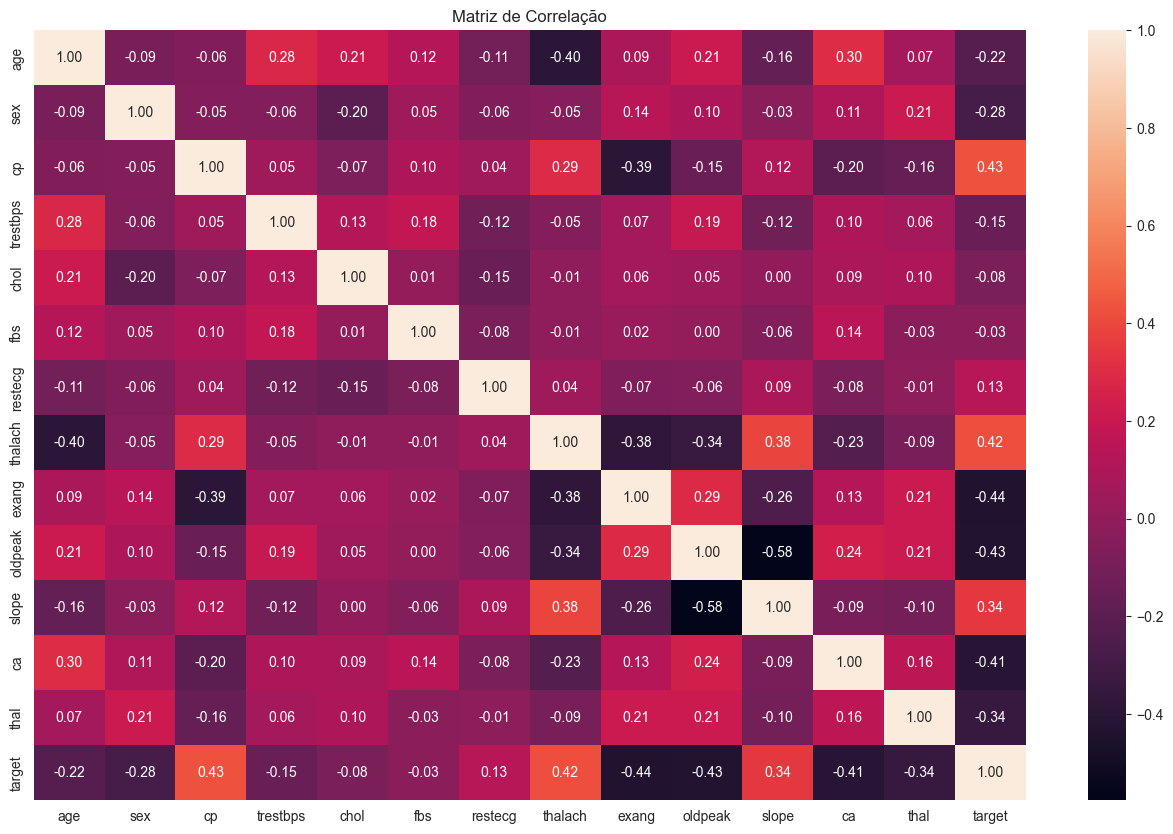

In [141]:
# Heatmap de correlação
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

## Análise da Correlação da Variável Target

O heatmap acima mostra a matriz de correlação entre as variáveis do dataset de doenças cardíacas.  
A variável **`target`** indica a presença de doença cardíaca (1) ou ausência (0).  

### Correlações mais relevantes com `target`

- **Correlação positiva (associadas a maior chance de doença):**
  - `cp` (**0.43**) → tipo de dor no peito.
  - `thalach` (**0.42**) → frequência cardíaca máxima atingida.
  - `slope` (**0.34**) → inclinação do segmento ST.

- **Correlação negativa (associadas a menor chance de doença):**
  - `exang` (**-0.43**) → angina induzida por exercício.
  - `oldpeak` (**-0.43**) → depressão do segmento ST durante esforço.
  - `ca` (**-0.41**) → número de vasos principais visualizados.
  - `thal` (**-0.34**) → resultado do exame talassemia.
  - `sex` (**-0.28**) → sexo (1 = masculino, 0 = feminino).
  - `age` (**-0.22**) → idade.


In [142]:
# Contando valores únicos para identificar tipos de variáveis
for c in df.columns:
    print(f"{c}: {df[c].nunique()}")  # poucas categorias → categórica, muitas → numérica


age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


## 3. Identificação de valores inconsistentes

### Colunas categóricas inconsistentes
- `ca` → valores: 0,1,2,3,4 
- `thal` → valores: 0,1,2,3

### Intervalos válidos
- `ca` → valores: 0,1,2,3  
- `thal` → valores: 0,1,2

In [143]:
valores_validos_ca = [0, 1, 2, 3]
valores_validos_thal = [0, 1, 2]

# Contando inconsistências
inconsistentes_ca = (~df['ca'].isin(valores_validos_ca)).sum()
inconsistentes_thal = (~df['thal'].isin(valores_validos_thal)).sum()

print(f'Valores inconsistentes em ca: {inconsistentes_ca}')
print(f'Valores inconsistentes em thal: {inconsistentes_thal}')

Valores inconsistentes em ca: 4
Valores inconsistentes em thal: 117


### Estratégia de tratamento

1. **`ca`** → poucos registros inconsistentes → imputar com **moda**  
2. **`thal`** → ~39% registros inconsistentes → criar categoria **`unknown`**

In [144]:
# Tratamento da coluna 'ca'
moda_ca = df.loc[df['ca'].isin(valores_validos_ca), 'ca'].mode()[0]
df['ca'] = df['ca'].apply(lambda x: moda_ca if x not in valores_validos_ca else x)

# Tratamento da coluna 'thal'
df['thal_clean'] = df['thal'].apply(lambda x: x if x in valores_validos_thal else 'unknown')
df['thal'] = df['thal_clean']
df.drop(columns=['thal_clean'], inplace=True)

# Conferindo distribuição
print(df['ca'].value_counts())
print(df['thal'].value_counts())


ca
0    179
1     65
2     38
3     20
Name: count, dtype: int64
thal
2          165
unknown    117
1           18
0            2
Name: count, dtype: int64


## 4. Preparando variáveis categóricas e numéricas para análise

- Categorias: ≤5 valores únicos (exceto target)  
- Numéricas: demais

In [145]:
categoricas = [c for c in df.columns if df[c].nunique() <= 5 and c != 'target']
numericas = [c for c in df.columns if df[c].nunique() > 5]

display(categoricas)
display(numericas)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## 5. Visualização das variáveis

- Categóricas: countplot por target  
- Numéricas: histograma com KDE

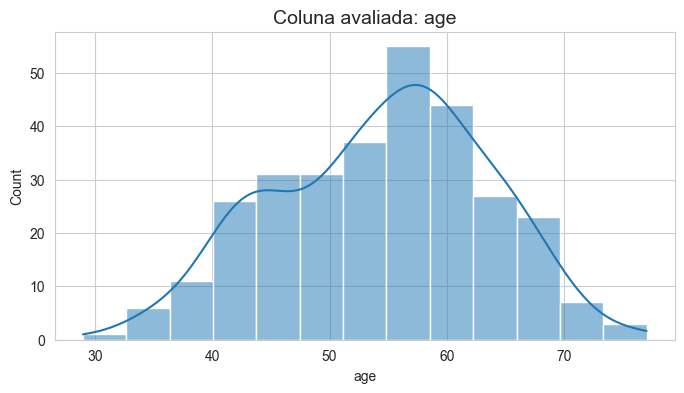

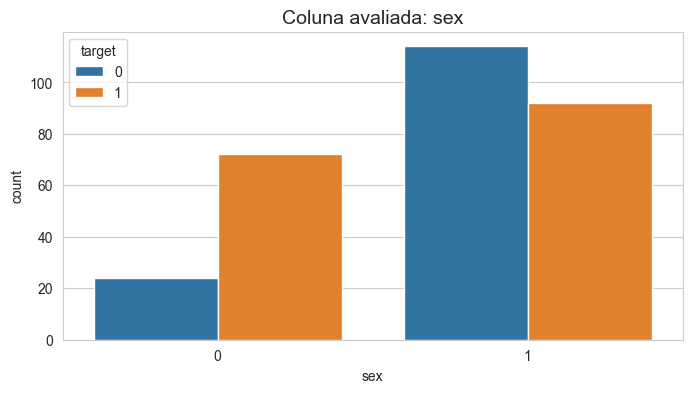

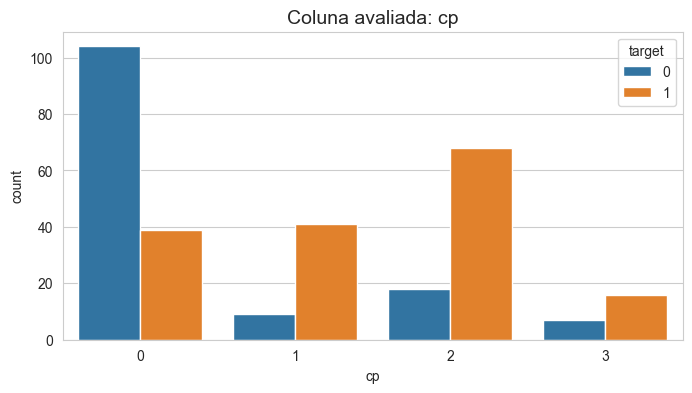

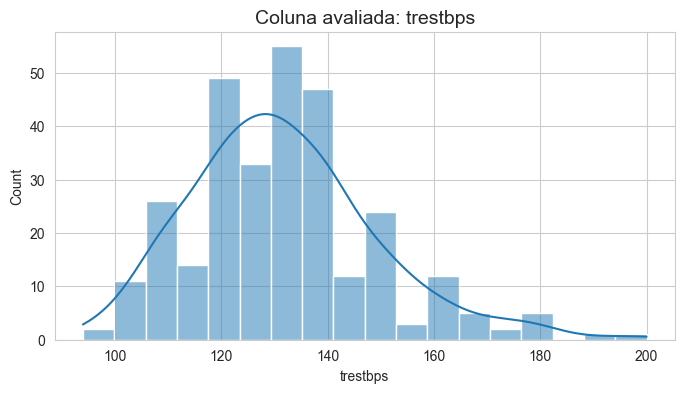

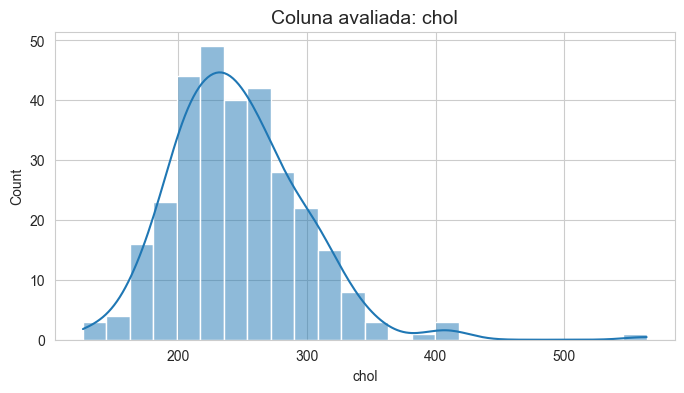

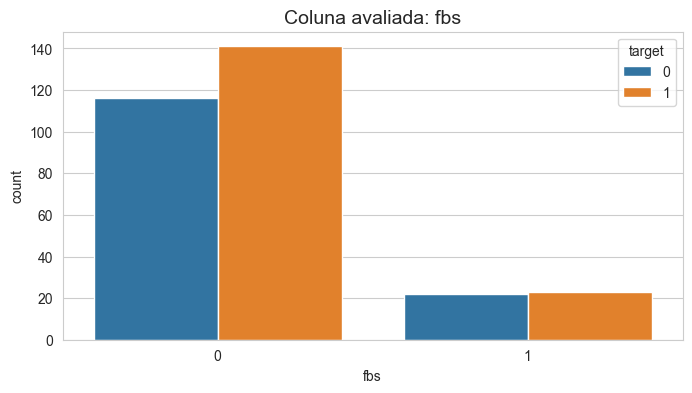

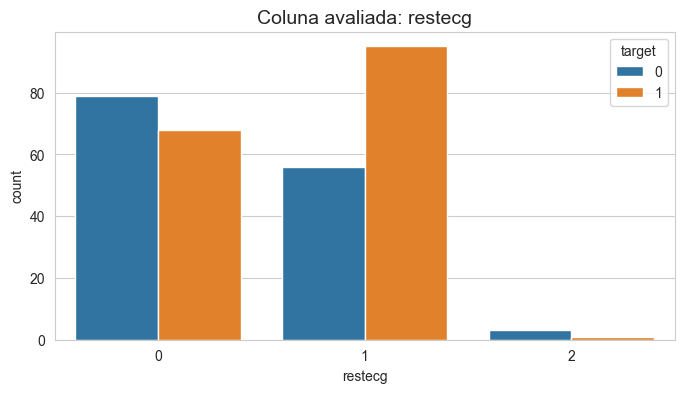

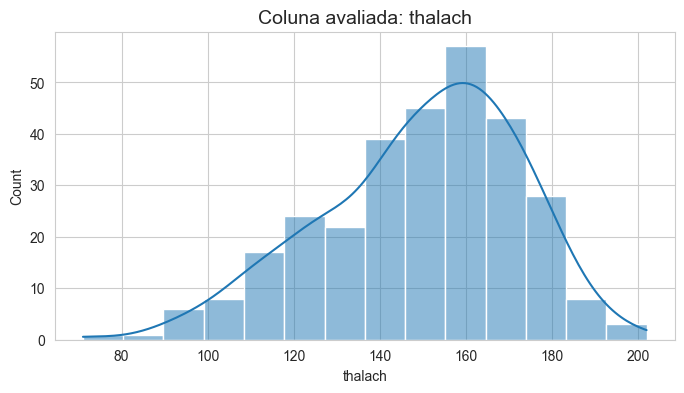

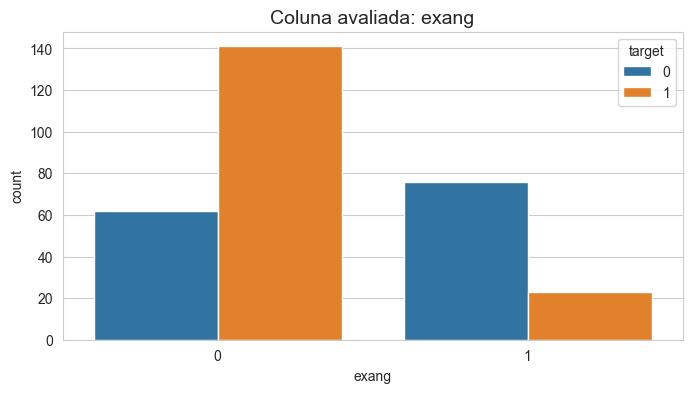

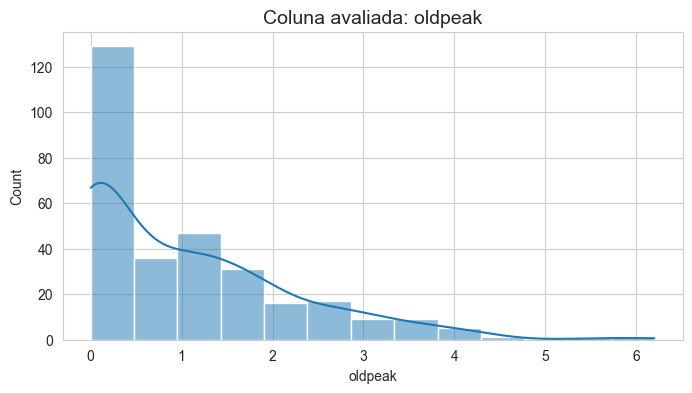

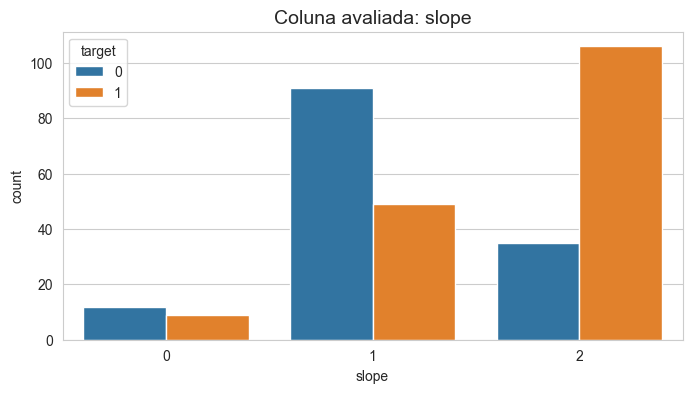

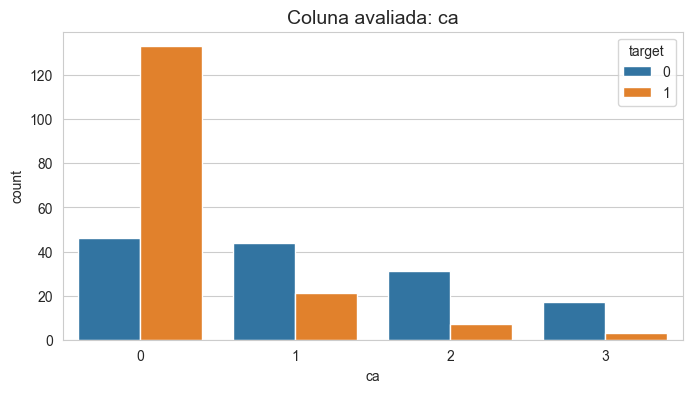

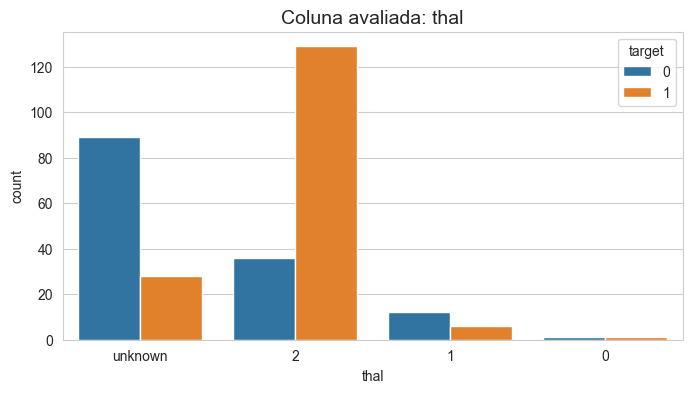

In [146]:
for c in df.columns:
    if c == 'target':
        continue
    plt.figure(figsize=(8, 4))
    plt.title(f"Coluna avaliada: {c}", fontsize=14)
    
    if c in categoricas:
        sns.countplot(x=df[c], hue=df["target"])
    elif c in numericas:
        sns.histplot(df[c], kde=True)


## 6. Tratamento de Outliers (Winsorização pelo IQR)

Valores extremos podem distorcer análises em datasets pequenos.  
Estratégia: substituir os outliers pelos limites do IQR (1.5 × IQR).

<Axes: >

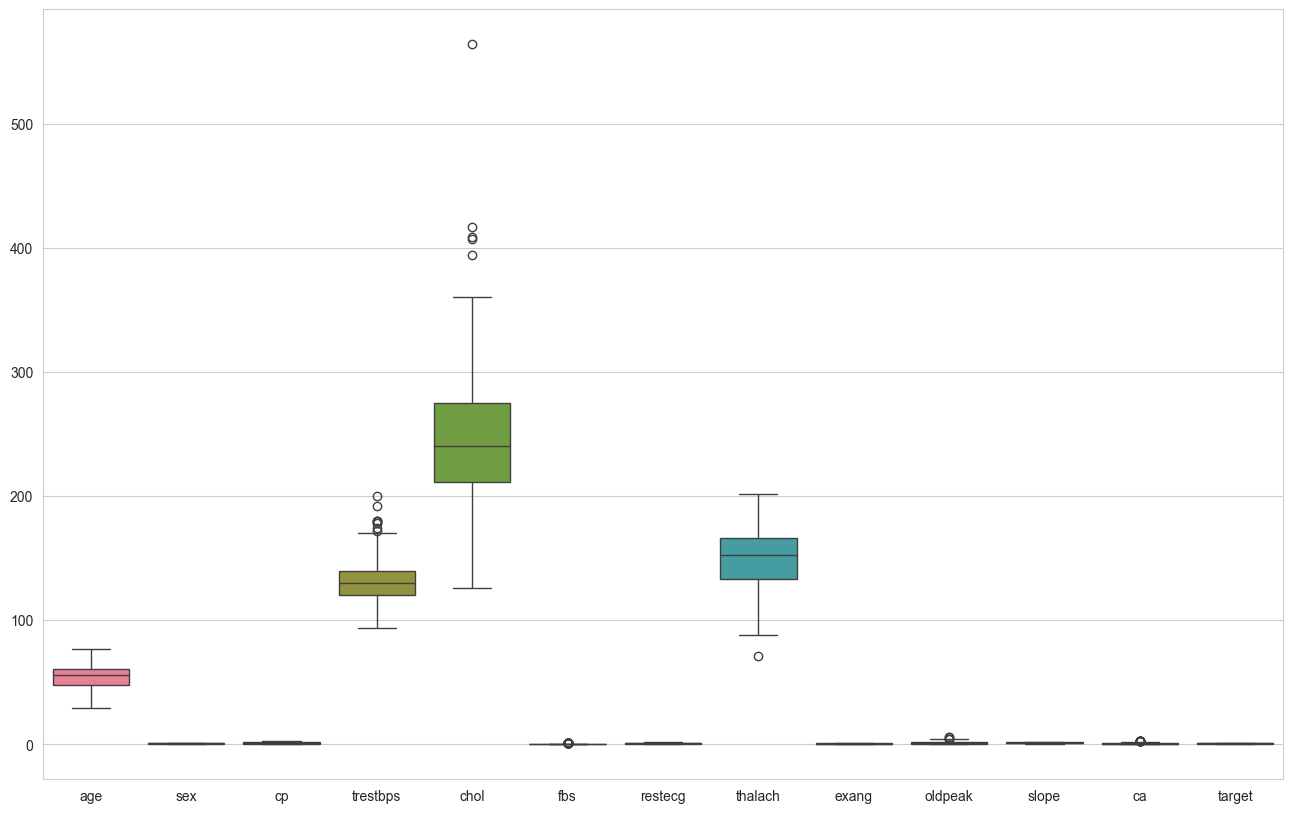

In [147]:
# Verificando os Outliers com boxplot
plt.figure(figsize= (16, 10))
sns.boxplot(data= df)

In [148]:
# Tratamento dos outliers

df_tratado = df.copy()

for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]) and c not in categoricas and c != 'target':  # aplica só em colunas numéricas
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Aplicando função clip para substituir valores abaixo ou acima dos limites
        df_tratado[c] = df[c].clip(lower=limite_inferior, upper=limite_superior)

df_tratado.reset_index(drop=True, inplace=True)




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.665563,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.935142,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,1.000000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.258278,245.377070,0.149007,0.526490,149.612997,0.327815,1.027815,1.397351,0.665563,0.543046
std,9.04797,0.466426,1.032044,16.605232,47.486683,0.356686,0.526027,22.765983,0.470196,1.110395,0.616274,0.935142,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.125000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,370.375000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,1.000000


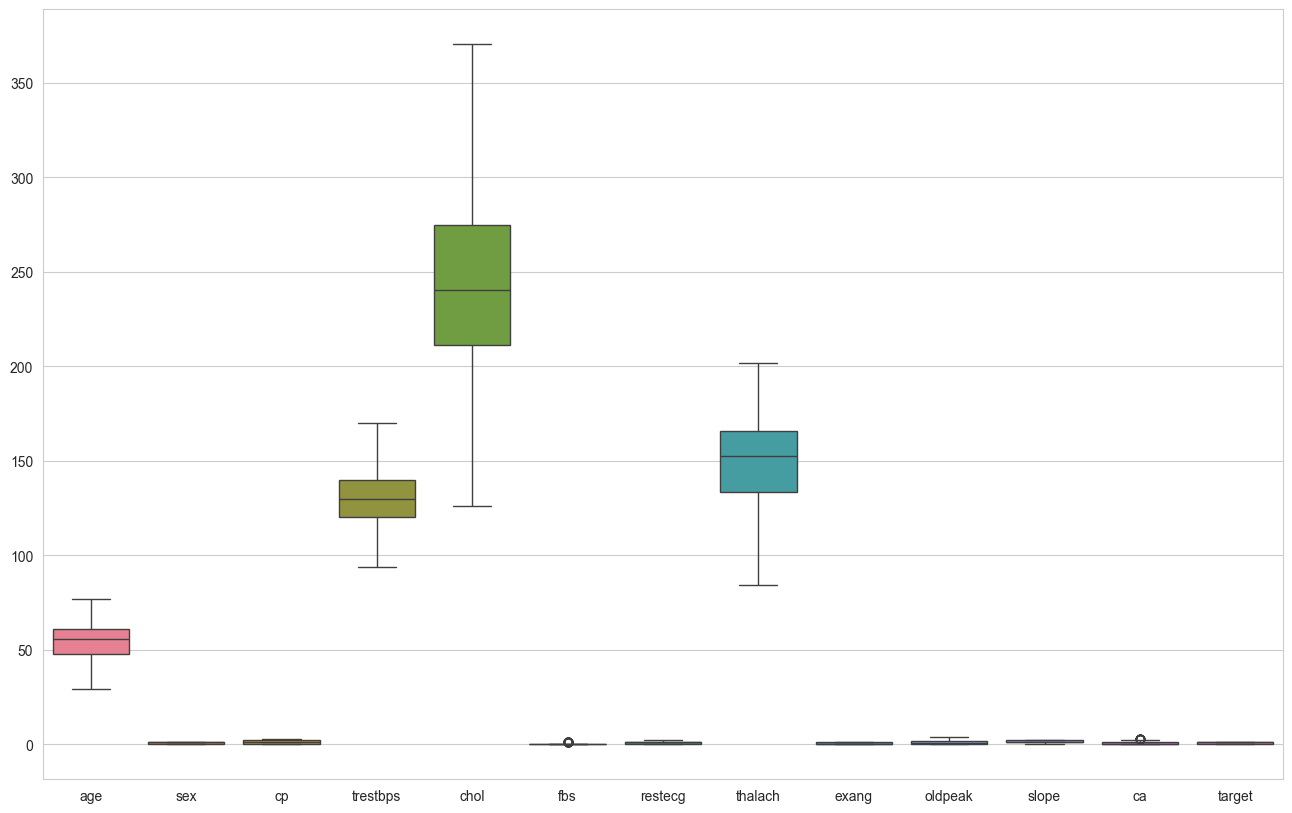

In [149]:
# Comparando estatísticas antes e depois do tratamento
display(df.describe())
display(df_tratado.describe())

# Boxplot final
plt.figure(figsize=(16,10))
sns.boxplot(data=df_tratado)
plt.show()

## 7. Encoding de variáveis categóricas

- Transformando variáveis categóricas em colunas dummy para ML

In [152]:
hd = pd.get_dummies(df_tratado, columns=categoricas)
hd.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2,thal_unknown
0,52,125,212.0,168.0,1.0,0,False,True,True,False,...,False,True,False,False,True,False,False,False,False,True
1,53,140,203.0,155.0,3.1,0,False,True,True,False,...,False,False,True,False,False,False,False,False,False,True
2,70,145,174.0,125.0,2.6,0,False,True,True,False,...,False,False,True,False,False,False,False,False,False,True
3,61,148,203.0,161.0,0.0,0,False,True,True,False,...,False,True,False,True,False,False,False,False,False,True
4,62,138,294.0,106.0,1.9,0,True,False,True,False,...,True,False,False,False,False,True,False,False,True,False


## 8. Salvando DataFrame Tratado

Após o tratamento de valores inconsistentes, outliers e encoding, o dataset está pronto para ser utilizado em modelos de Machine Learning.  
Salvamos em **`data/processed/`** para manter a organização do projeto.

In [156]:
# Salvando dataset tratado
output_path = "/Users/laisbertoni/Documents/data-analysis-projects/data-analysis-projects/projeto-03-heart-disease/data/processed/heart_clean.csv"
hd.to_csv(output_path, index=False)

print(f"Dataset tratado salvo em: {output_path}")

Dataset tratado salvo em: /Users/laisbertoni/Documents/data-analysis-projects/data-analysis-projects/projeto-03-heart-disease/data/processed/heart_clean.csv
